In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
df = pd.read_csv('Survey on OTT (Responses)Correction.csv') 
df.head() 
df.info() 
print(df.describe()) 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Name                                      353 non-null    object
 1   Gender                                    353 non-null    object
 2   Age                                       353 non-null    object
 3   Profession                                353 non-null    object
 4   Monthly Income                            353 non-null    object
 5   Location                                  353 non-null    object
 6   OTT currently using                       353 non-null    object
 7   OTT currently subscribed                  353 non-null    object
 8   OTTmostly                                 353 non-null    object
 9   Years                                     353 non-null    object
 10  Count of OTT using                        353 non-

In [2]:
# 1. Basic cleaning & missing values

print("Missing values per column:")
print(df.isna().sum())
likert_cols = [
    "Binge-watch content",
    "Download offline viewing",
    "Original content",
    "Movies theatres",
    "Social features",
    "Recommendations",
    "Search function",
    "Rewatch content",
    "subscribe same platform",
    "Subscription price",
    "Share content with others",
    "Share accounts with others",
    "Buffering or lag",
    "Satisfied with the content variety",
    "Overall experience",
    "Feel personalized",
    "Video quality offered"
]

for col in likert_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col].fillna(df[col].median(), inplace=True)

Missing values per column:
Name                                        0
Gender                                      0
Age                                         0
Profession                                  0
Monthly Income                              0
Location                                    0
OTT currently using                         0
OTT currently subscribed                    0
OTTmostly                                   0
Years                                       0
Count of OTT using                          0
Usage                                       0
Time                                        0
Genre                                       0
Content                                     0
Amount                                      0
Access                                      0
Influence                                   0
Choice                                      0
Binge-watch content                         0
Download offline viewing                    0
Origina

In [3]:
# 2. Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

In [4]:
# 3. Prepare features (X) and target (y)

target_col = "Overall experience "    

df["Overall_high"] = (df[target_col] >= 4).astype(int)
feature_cols = [c for c in likert_cols if c in df.columns and c != target_col]

X = df[feature_cols]
y = df["Overall_high"]

print("Features used:", feature_cols)
print("Target distribution:\n", y.value_counts())

Features used: ['Download offline viewing', 'Original content', 'Movies theatres', 'Social features', 'Recommendations', 'Search function', 'Rewatch content', 'Share content with others', 'Share accounts with others', 'Video quality offered']
Target distribution:
 Overall_high
1    263
0     90
Name: count, dtype: int64


In [5]:
# 4. Train–test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train size: 247
Test size: 106


In [6]:
# 5. Define models

models = {}

# Logistic Regression 
models["Logistic Regression"] = LogisticRegression(
    solver="liblinear",
    random_state=42
)

# Decision Tree
models["Decision Tree"] = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

# Random Forest
models["Random Forest"] = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Naive Bayes
models["Naive Bayes"] = GaussianNB()

# SVM 
models["SVM"] = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)

In [8]:
# 6. Train, predict, and evaluate each model

results = []

for name, model in models.items():

    if name in ["Logistic Regression", "SVM"]:
        Xtr, Xte = X_train_scaled, X_test_scaled
    else:
        Xtr, Xte = X_train, X_test

    # Train
    model.fit(Xtr, y_train)

    # Predict
    y_pred = model.predict(Xte)
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    rec = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1_score": f1
    })

    print("====================================")
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3, zero_division=0))

Model: Logistic Regression
Confusion Matrix:
[[12 15]
 [ 5 74]]

Classification Report:
              precision    recall  f1-score   support

           0      0.706     0.444     0.545        27
           1      0.831     0.937     0.881        79

    accuracy                          0.811       106
   macro avg      0.769     0.691     0.713       106
weighted avg      0.799     0.811     0.795       106

Model: Decision Tree
Confusion Matrix:
[[22  5]
 [ 9 70]]

Classification Report:
              precision    recall  f1-score   support

           0      0.710     0.815     0.759        27
           1      0.933     0.886     0.909        79

    accuracy                          0.868       106
   macro avg      0.822     0.850     0.834       106
weighted avg      0.876     0.868     0.871       106

Model: Random Forest
Confusion Matrix:
[[19  8]
 [ 4 75]]

Classification Report:
              precision    recall  f1-score   support

           0      0.826     0.704     0

In [9]:
# 7. Compare all models in one table

results_df = pd.DataFrame(results).set_index("Model")
print("\nSummary of model performance:")
display(results_df)


Summary of model performance:


,Accuracy,Precision,Recall,F1_score
Model,,,,
Logistic Regression,0.811321,0.831461,0.936709,0.880952
Decision Tree,0.867925,0.933333,0.886076,0.909091
Random Forest,0.886792,0.903614,0.949367,0.925926
Naive Bayes,0.735849,0.807229,0.848101,0.827160
SVM,0.849057,0.853933,0.962025,0.904762


In [10]:
# 8. Feature importance from Random Forest

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    rf_model = models["Random Forest"]
except:
    X = df[feature_cols]
    y = df["Overall_high"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )
    rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("Feature importance (Random Forest):")
display(fi_df)

Feature importance (Random Forest):


,Feature,Importance
8,Share accounts with others,0.127181
1,Original content,0.125019
9,Video quality offered,0.115196
2,Movies theatres,0.100034
3,Social features,0.098075
4,Recommendations,0.093307
5,Search function,0.090985
0,Download offline viewing,0.090863
6,Rewatch content,0.082675
7,Share content with others,0.076666


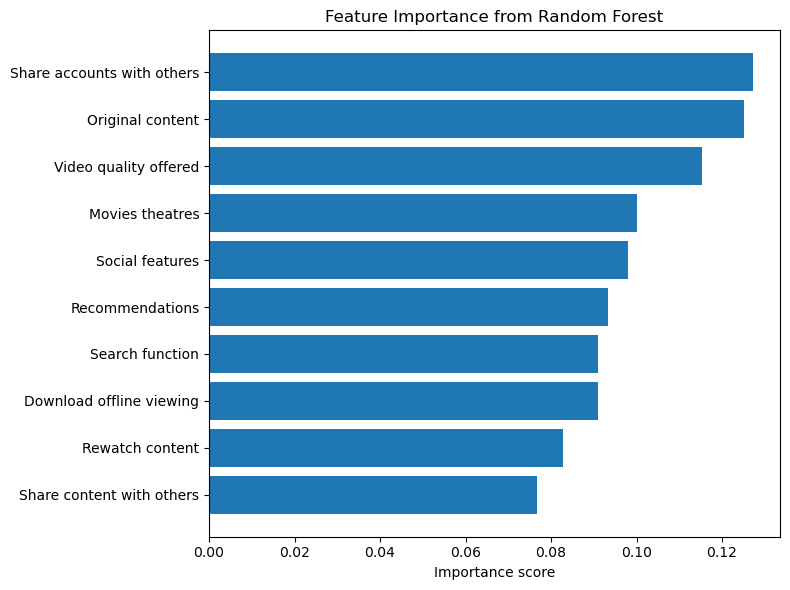

In [11]:
# 9. Plotting feature importance

plt.figure(figsize=(8,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Importance score")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [12]:
# 10. Get only TOP 5 most important features
K = 5
top_k = fi_df.head(K)

print(f"\nTop {K} most important features:")
display(top_k)


Top 5 most important features:


,Feature,Importance
8,Share accounts with others,0.127181
1,Original content,0.125019
9,Video quality offered,0.115196
2,Movies theatres,0.100034
3,Social features,0.098075
